In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


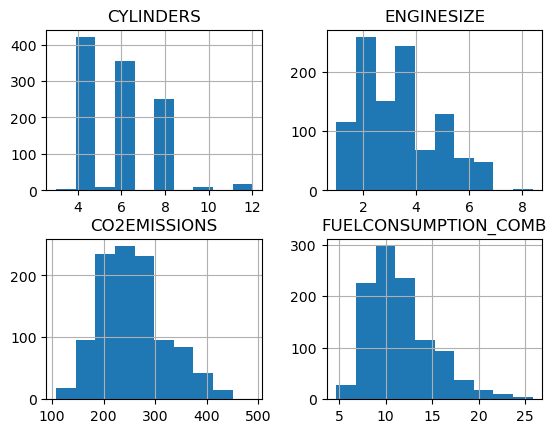

In [7]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()


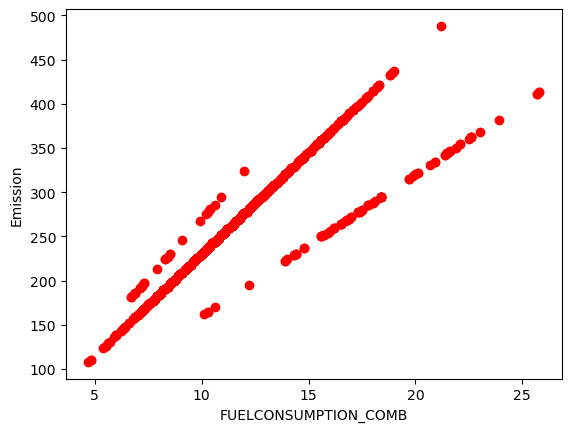

In [15]:
#plot each of these features against the Emission, to see how linear their relationship is
plt.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS',  c='r', data=df)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [17]:
#Split the data in train and test sets
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [38]:
train_x = train[["FUELCONSUMPTION_COMB"]]
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = test[["FUELCONSUMPTION_COMB"]]

In [39]:
#Model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

#train the model
regr.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

#predict
test_y_ = regr.predict(test_x)

Coefficients:  [[16.81217783]]
Intercept:  [61.67508016]


In [40]:
regr.score(train_x,train_y)

0.8107886001383918